<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

---
#Initializing
---

In [ ]:
#importing pandas ,numpy,matplotlib.pyplot & seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Ali-Asgar-Lakdawala/Bike-Sharing-Demand-Prediction/main/SeoulBikeData.csv', encoding = "ISO-8859-1")

In [ ]:
# Set the display figure size using rcParams method 
sns.set(rc={'figure.figsize':(8,6)})
plt.rcParams['figure.figsize'] = [8,6]

---
#EDA
---

In [ ]:
og_df=df.copy()

In [ ]:
print ('Shape dataset')
print (df.shape)
print ('\n')
print ('Info Dataset')
print (df.info())
print ('\n')
print ('See if any missing value of Dataset')
print (df.isna().sum())

Shape dataset
(8760, 14)


Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Function

In [ ]:
df.describe()

Rented Bike Count         Hour  ...  Rainfall(mm)  Snowfall (cm)
count        8760.000000  8760.000000  ...   8760.000000    8760.000000
mean          704.602055    11.500000  ...      0.148687       0.075068
std           644.997468     6.922582  ...      1.128193       0.436746
min             0.000000     0.000000  ...      0.000000       0.000000
25%           191.000000     5.750000  ...      0.000000       0.000000
50%           504.500000    11.500000  ...      0.000000       0.000000
75%          1065.250000    17.250000  ...      0.000000       0.000000
max          3556.000000    23.000000  ...     35.000000       8.800000

[8 rows x 10 columns]

In [ ]:
df.head()

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]

In [ ]:
df.Seasons.value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

good news it does not have any null values

In [ ]:
# create new day,month, hour info from Pickup time
df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)


In [ ]:
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

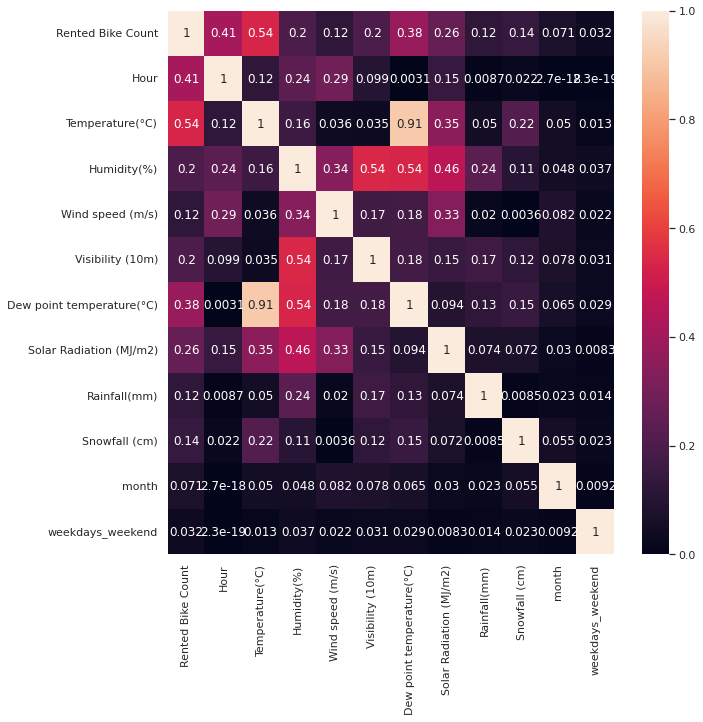

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(df.corr()),annot=True)


In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables       VIF
0                     Hour  3.961874
1          Temperature(°C)  3.236809
2              Humidity(%)  6.114153
3         Wind speed (m/s)  4.616621
4         Visibility (10m)  5.404128
5  Solar Radiation (MJ/m2)  2.272068
6             Rainfall(mm)  1.081252
7            Snowfall (cm)  1.125304
8                    month  4.580307
9         weekdays_weekend  1.399708

we can remove dew point tem as it is coorelated to temprature 

In [ ]:
numeric_features=df.describe().columns

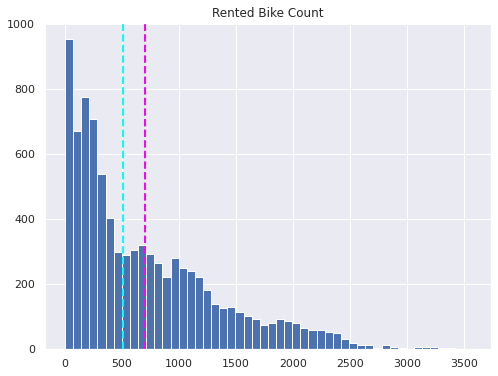

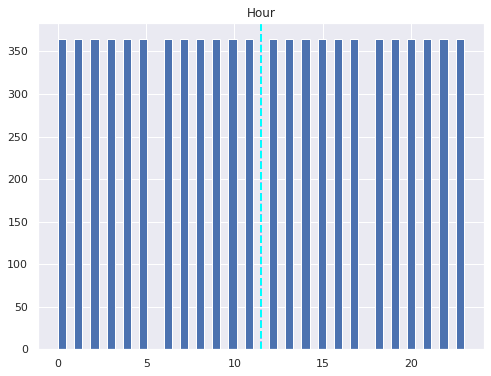

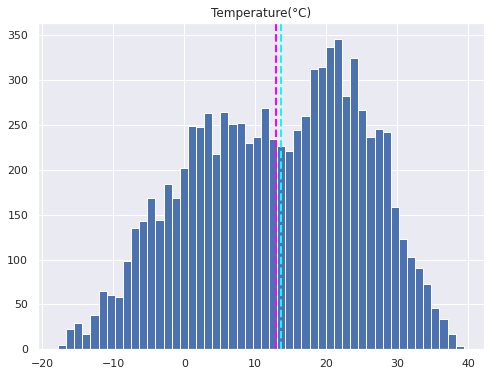

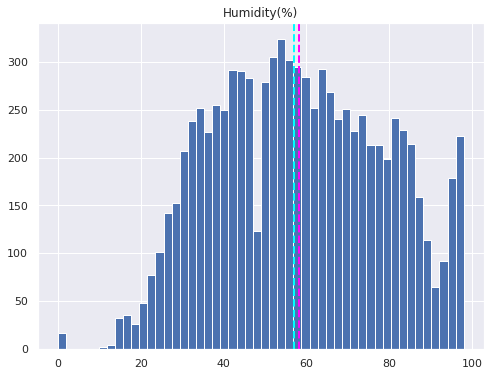

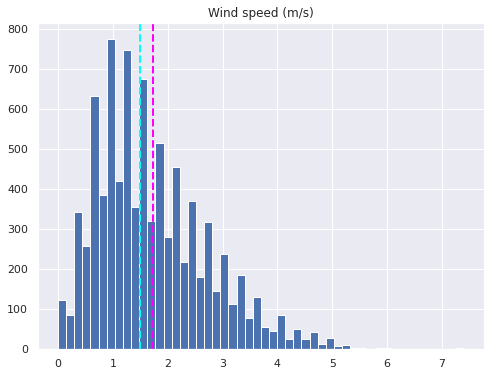

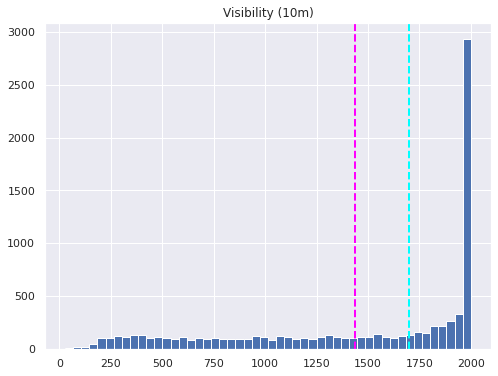

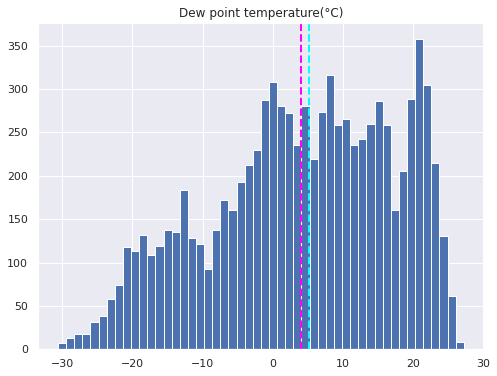

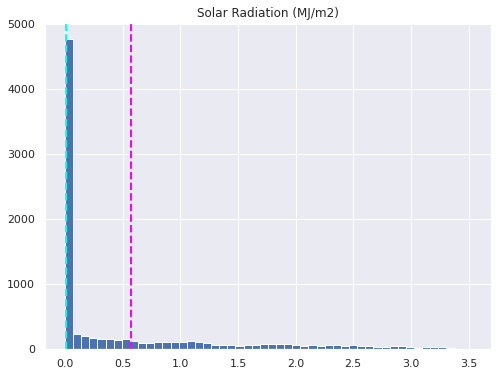

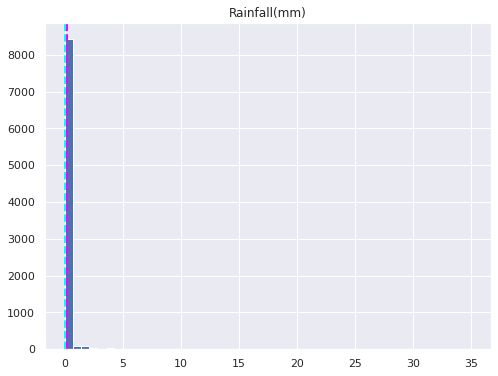

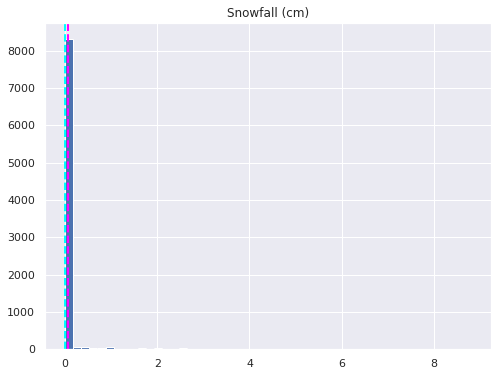

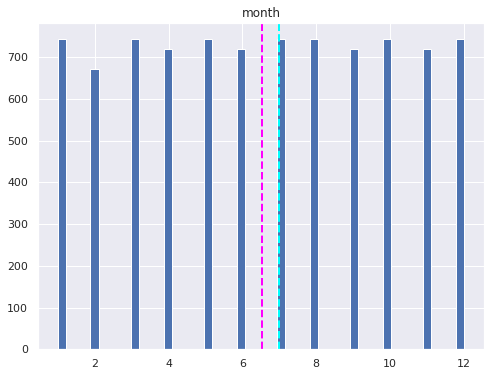

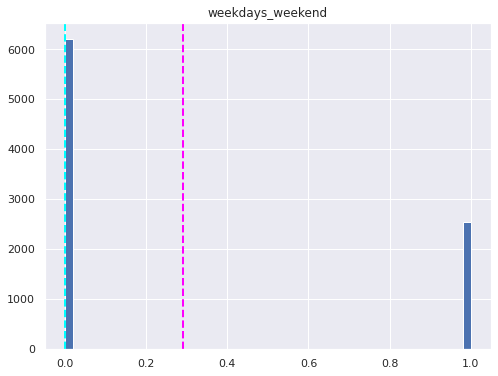

In [ ]:
#plotting histogram of all the numeric features of the dataset
for col in numeric_features[:]:
  fig=plt.figure()
  ax=fig.gca()
  feature=df[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

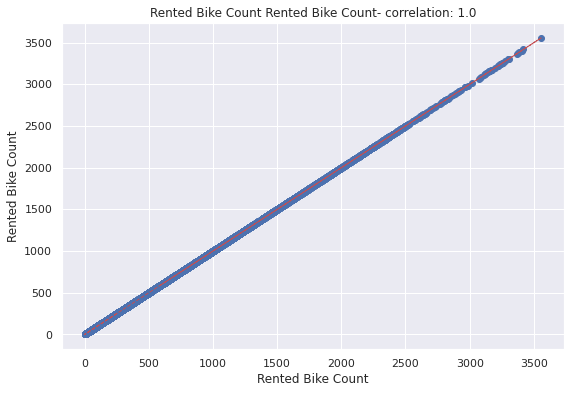

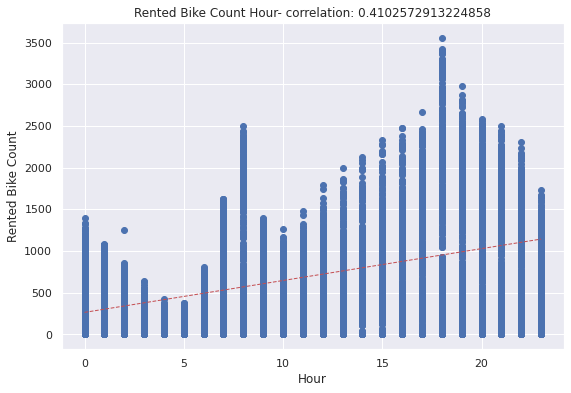

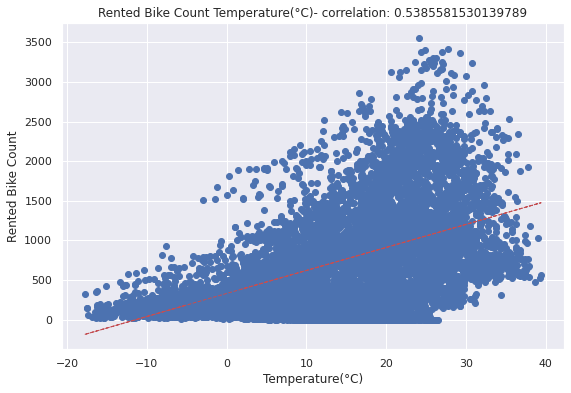

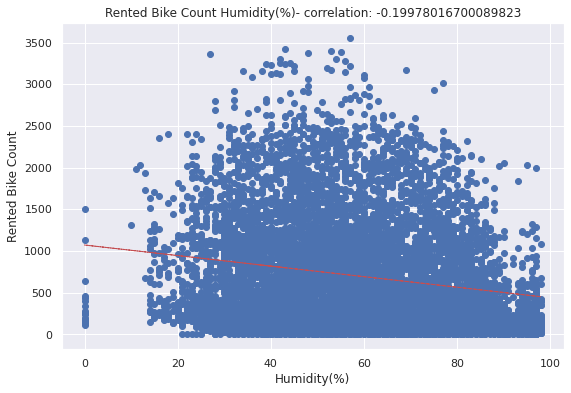

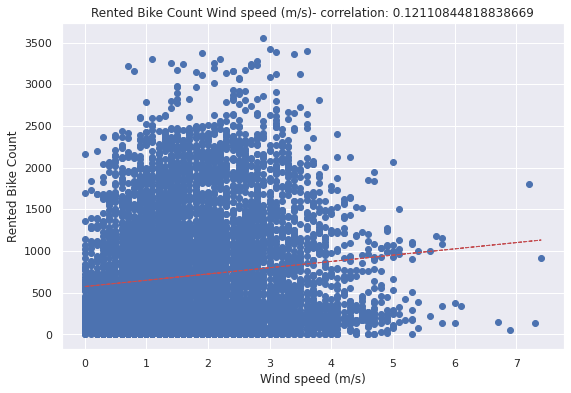

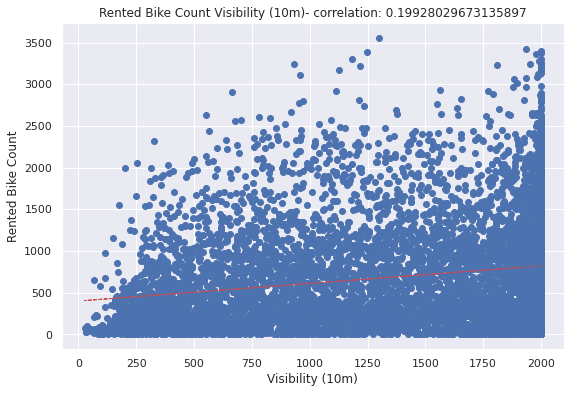

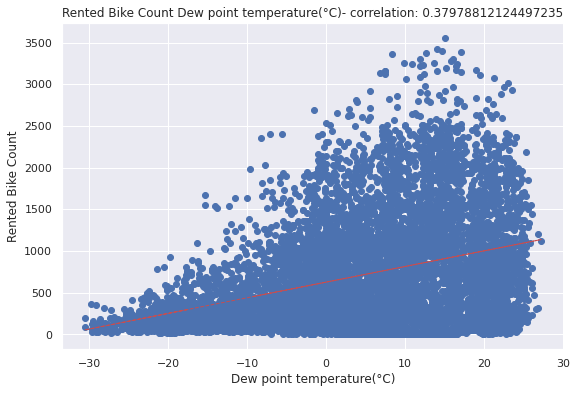

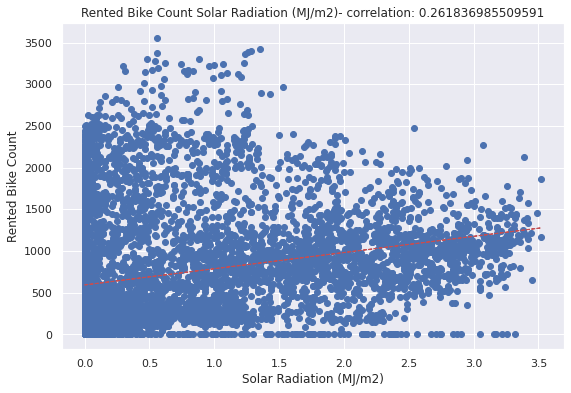

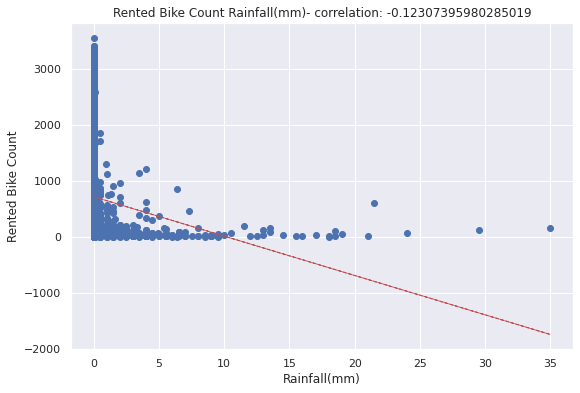

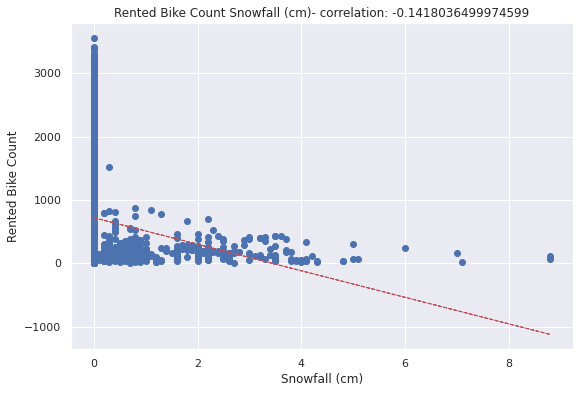

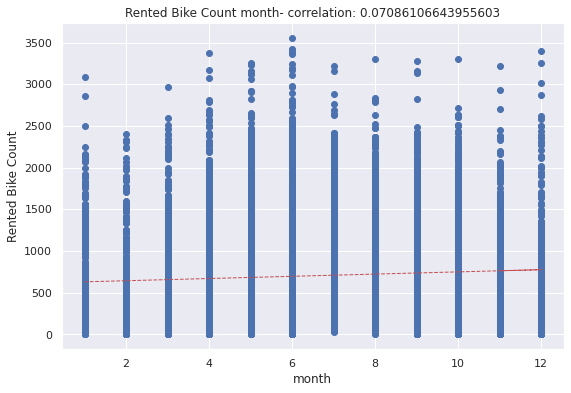

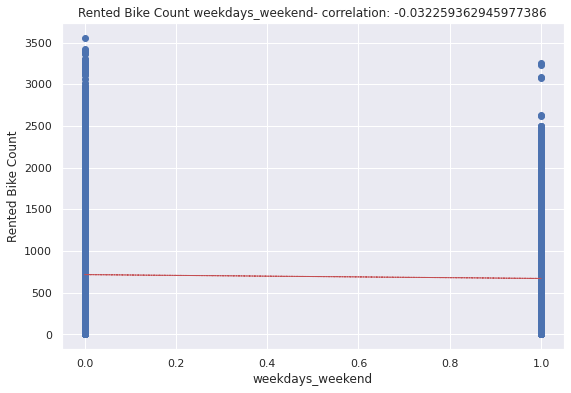

In [ ]:
for col in numeric_features:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df[col]
   label = df['Rented Bike Count']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('Rented Bike Count')
   ax.set_title('Rented Bike Count ' + col + '- correlation: ' + str(correlation))
   z = np.polyfit(df[col], df['Rented Bike Count'], 1)
   y_hat = np.poly1d(z)(df[col])
 
   plt.plot(df[col], y_hat, "r--", lw=1)
 
plt.show()

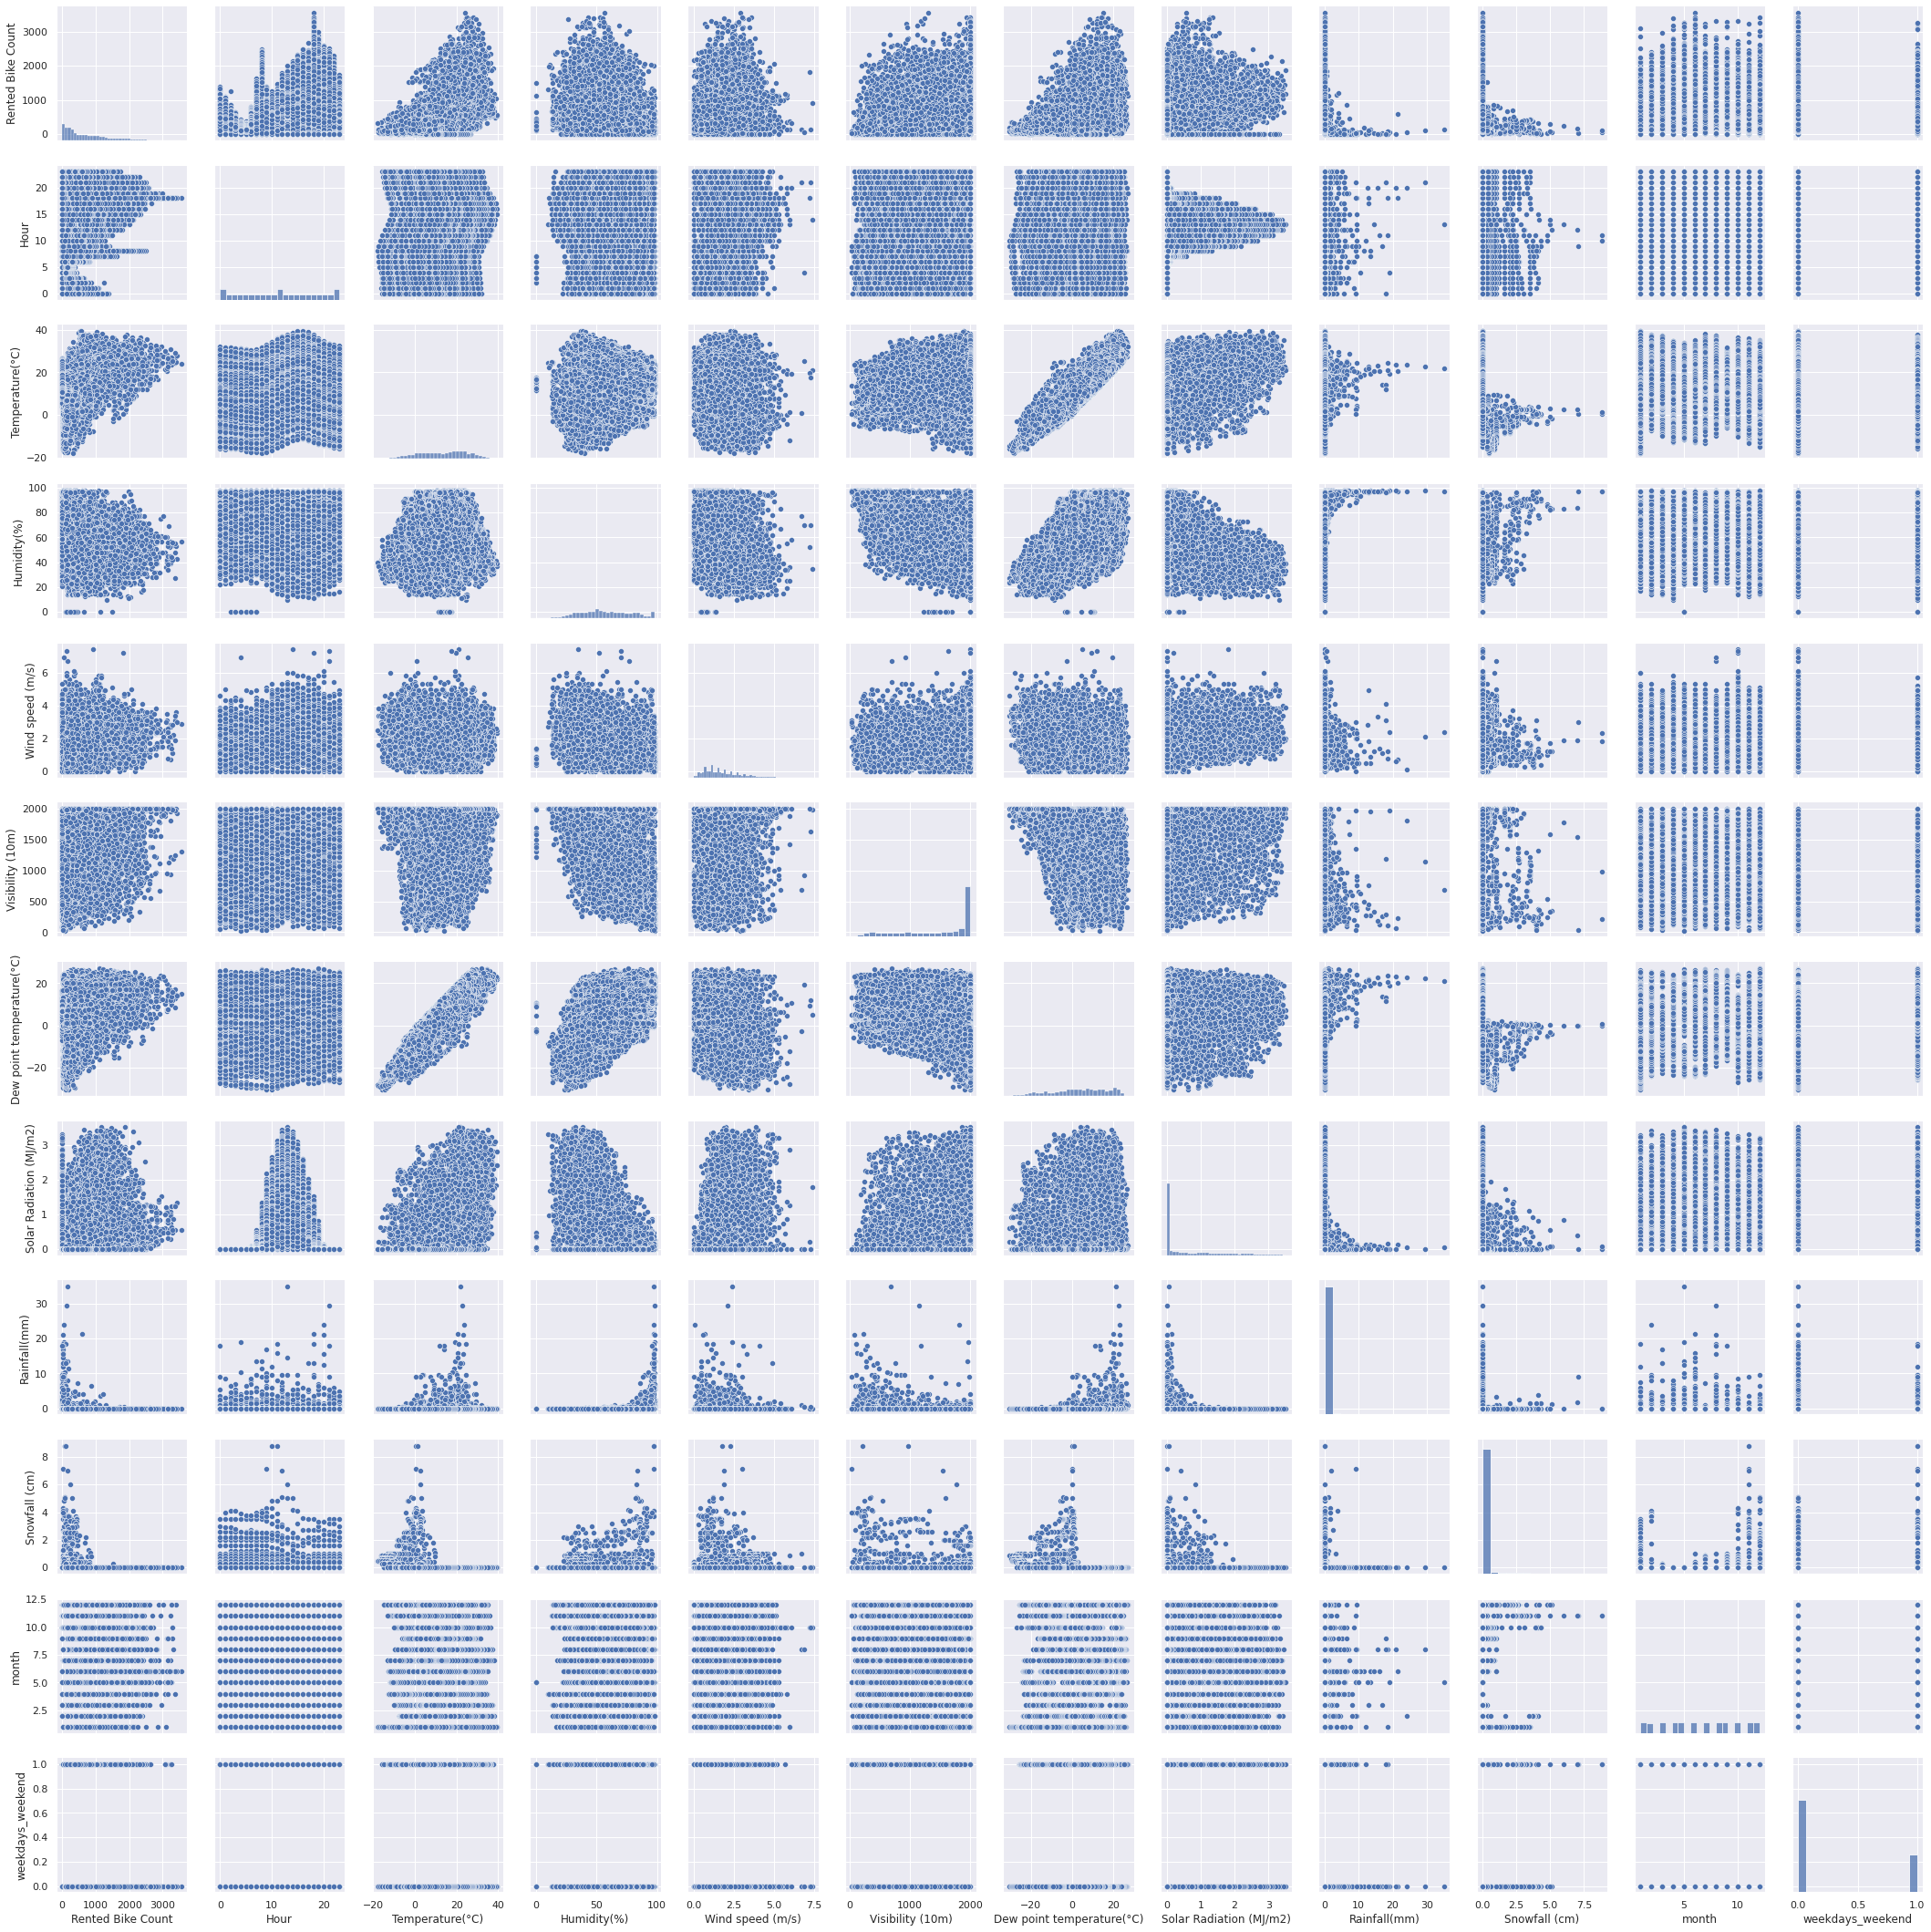

In [ ]:
sns.pairplot(df)

In [ ]:
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [ ]:
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  weekdays_weekend           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [ ]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Seasons          8760 non-null   object
 1   Holiday          8760 non-null   object
 2   Functioning Day  8760 non-null   object
dtypes: object(3)
memory usage: 205.4+ KB


In [ ]:
# categorical_features = pd.get_dummies(categorical_features,drop_first=True))
categorical_feature = pd.get_dummies(categorical_features)

In [ ]:
categorical_feature

Seasons_Autumn  Seasons_Spring  ...  Functioning Day_No  Functioning Day_Yes
0                  0               0  ...                   0                    1
1                  0               0  ...                   0                    1
2                  0               0  ...                   0                    1
3                  0               0  ...                   0                    1
4                  0               0  ...                   0                    1
...              ...             ...  ...                 ...                  ...
8755               1               0  ...                   0                    1
8756               1               0  ...                   0                    1
8757               1               0  ...                   0                    1
8758               1               0  ...                   0                    1
8759               1               0  ...                   0                    1

[8760 rows x 8 columns]

In [ ]:
df= pd.concat([categorical_feature,numeric_features],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Autumn             8760 non-null   uint8  
 1   Seasons_Spring             8760 non-null   uint8  
 2   Seasons_Summer             8760 non-null   uint8  
 3   Seasons_Winter             8760 non-null   uint8  
 4   Holiday_Holiday            8760 non-null   uint8  
 5   Holiday_No Holiday         8760 non-null   uint8  
 6   Functioning Day_No         8760 non-null   uint8  
 7   Functioning Day_Yes        8760 non-null   uint8  
 8   Rented Bike Count          8760 non-null   int64  
 9   Hour                       8760 non-null   int64  
 10  Temperature(°C)            8760 non-null   float64
 11  Humidity(%)                8760 non-null   int64  
 12  Wind speed (m/s)           8760 non-null   float64
 13  Visibility (10m)           8760 non-null   int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


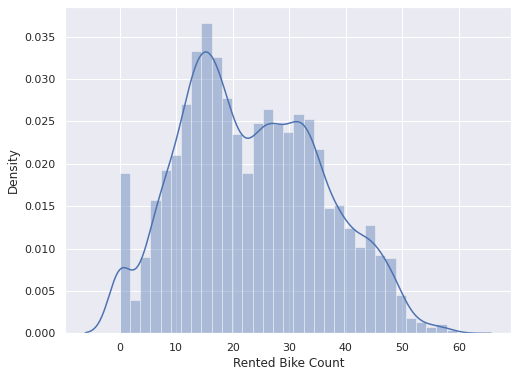

In [ ]:
sns.distplot(np.sqrt(df['Rented Bike Count']))

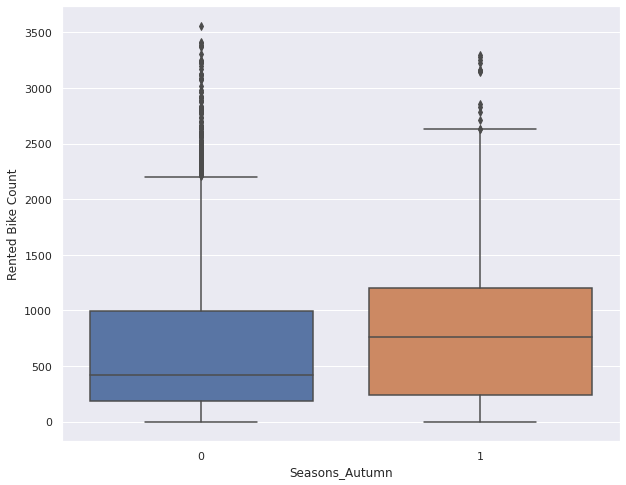

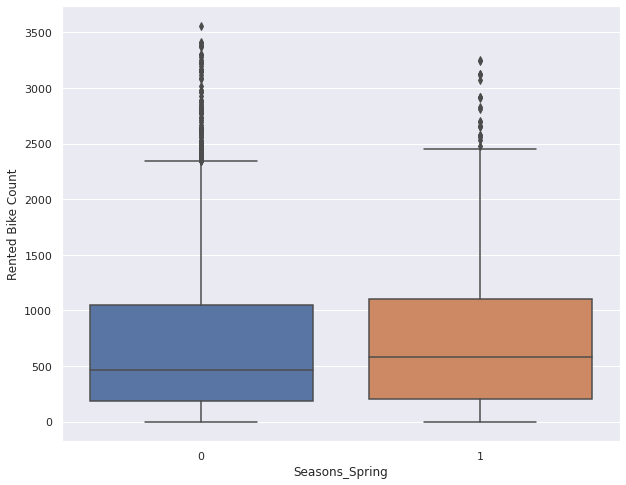

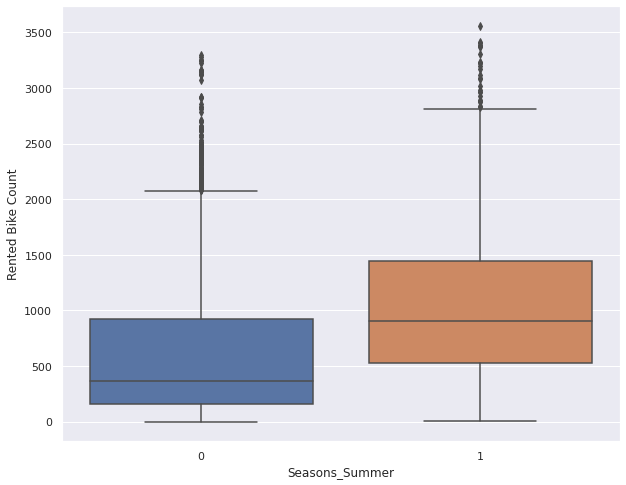

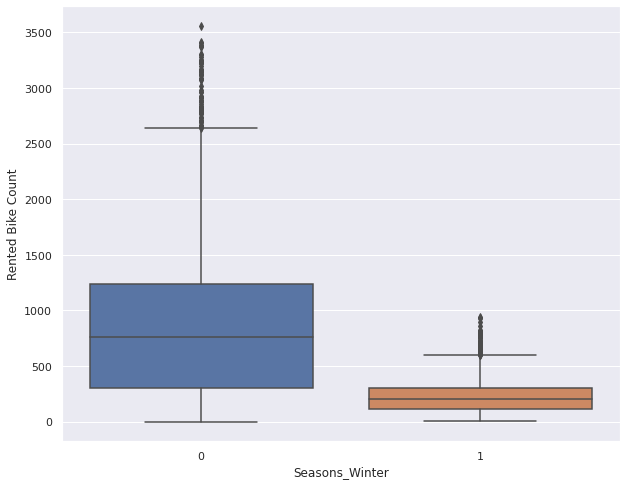

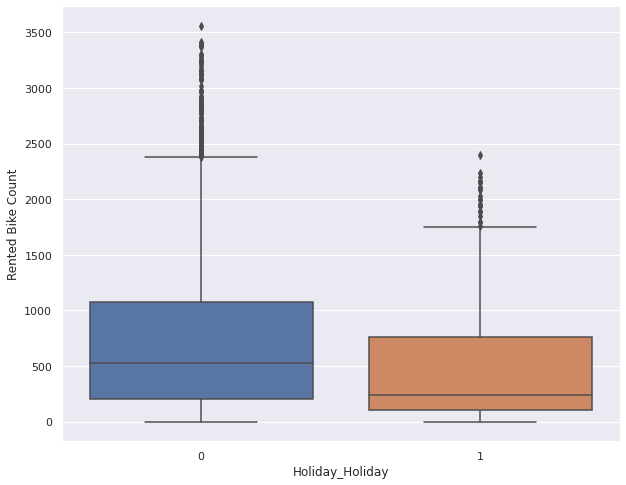

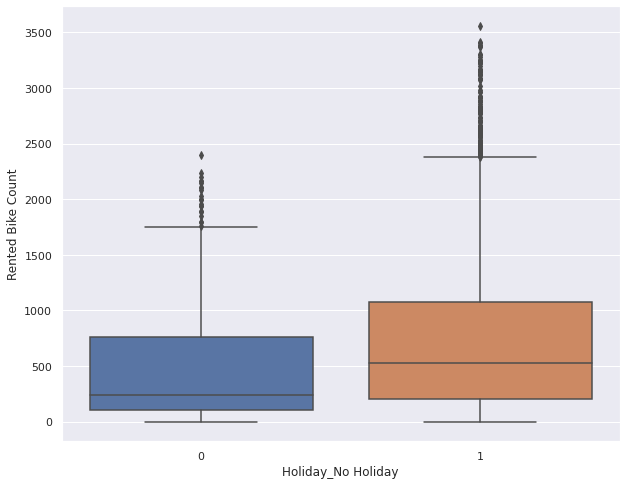

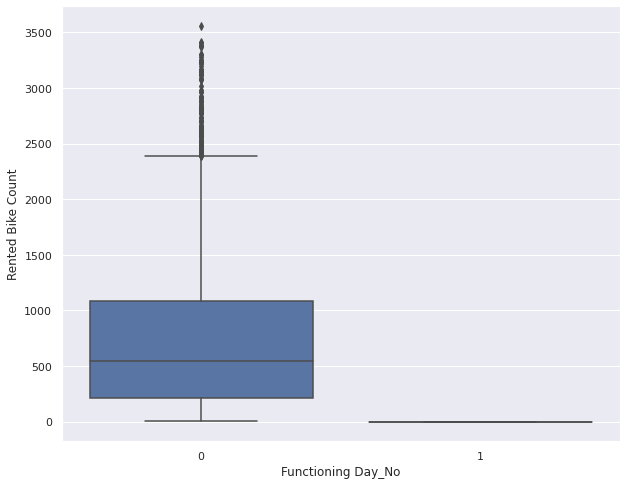

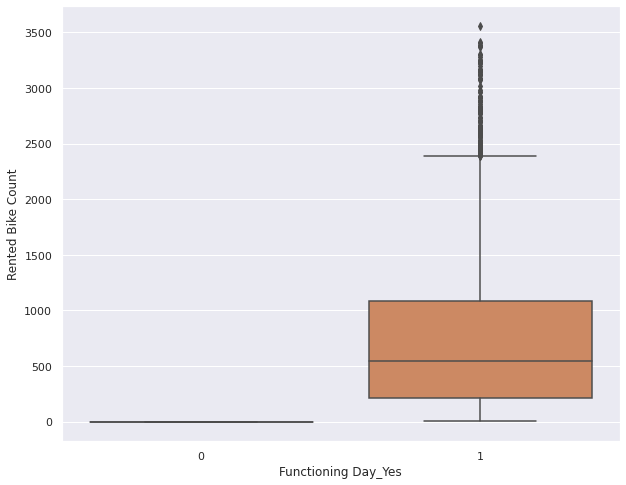

In [ ]:
for col in categorical_feature.columns:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

since their are no bike booking when it is not a functional day we can drop that column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Autumn             8760 non-null   uint8  
 1   Seasons_Spring             8760 non-null   uint8  
 2   Seasons_Summer             8760 non-null   uint8  
 3   Seasons_Winter             8760 non-null   uint8  
 4   Holiday_Holiday            8760 non-null   uint8  
 5   Holiday_No Holiday         8760 non-null   uint8  
 6   Functioning Day_No         8760 non-null   uint8  
 7   Functioning Day_Yes        8760 non-null   uint8  
 8   Rented Bike Count          8760 non-null   int64  
 9   Hour                       8760 non-null   int64  
 10  Temperature(°C)            8760 non-null   float64
 11  Humidity(%)                8760 non-null   int64  
 12  Wind speed (m/s)           8760 non-null   float64
 13  Visibility (10m)           8760 non-null   int64

---
#linear reg
---

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def score_metrix (actual,predicted):
  MSE  = mean_squared_error(actual,predicted)
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2 = r2_score(actual,predicted)
  print("R2 :" ,r2)
  print("Adjusted R2 : ",1-(1-r2_score(actual,predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
X=df[[i for i in df.columns if i not in [['Rented Bike Count','Dew point temperature(°C)','Functioning Day_No','Functioning Day_Yes']]]]
Y=np.sqrt(df['Rented Bike Count'])

In [ ]:
X

Seasons_Autumn  Seasons_Spring  ...  month  weekdays_weekend
0                  0               0  ...      1                 0
1                  0               0  ...      1                 0
2                  0               0  ...      1                 0
3                  0               0  ...      1                 0
4                  0               0  ...      1                 0
...              ...             ...  ...    ...               ...
8755               1               0  ...     11                 0
8756               1               0  ...     11                 0
8757               1               0  ...     11                 0
8758               1               0  ...     11                 0
8759               1               0  ...     11                 0

[8760 rows x 20 columns]

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [ ]:
#STANDARD SCALER
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
X_train[0:10]

array([[-0.57559273, -0.57488971, -0.58004517,  1.72749323, -0.22738694,
         0.22738694, -0.18525631,  0.18525631, -0.92025642, -1.36874406,
        -1.71165528,  0.47421008, -0.78354199,  0.33582343, -1.26534686,
        -0.65163688, -0.12795769,  4.46880116,  1.58899392, -0.63265769],
       [-0.57559273, -0.57488971,  1.72400366, -0.57887347, -0.22738694,
         0.22738694, -0.18525631,  0.18525631,  0.23263946, -1.65701618,
         1.34968356,  0.91576468,  0.36961183,  0.04394787,  1.55928395,
        -0.65163688, -0.12795769, -0.17658844,  0.42922165, -0.63265769],
       [ 1.73733952, -0.57488971, -0.58004517, -0.57887347, -0.22738694,
         0.22738694, -0.18525631,  0.18525631,  0.77117338, -0.35979168,
         0.7855344 ,  0.5232717 , -0.39915738,  0.92617061,  0.92905718,
         0.05429838, -0.12795769, -0.17658844,  0.71916472, -0.63265769],
       [-0.57559273, -0.57488971, -0.58004517,  1.72749323, -0.22738694,
         0.22738694, -0.18525631,  0.18525631, -

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the Test set results
Y_pred = regressor.predict(X_test)

In [ ]:
regressor.score(X_test,Y_test)

0.9656970733067396

In [ ]:
regressor.score(X_train,Y_train)

0.9641385581790252

In [ ]:
score_metrix(Y_test**2,Y_pred**2)

MSE : 17744.683569941328
RMSE : 133.2091722440363
R2 : 0.9568395794257396
Adjusted R2 :  0.9564416041322932


##lasso reg

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(X_train, Y_train)

0.9641452050213856

In [ ]:
lasso.coef_

array([ 5.04947903e-01,  2.03221589e-01,  2.56164609e-01, -4.27561282e-01,
       -1.73559119e-01,  0.00000000e+00, -2.40787314e+00,  2.39386052e-14,
        1.03672620e+01,  3.76880045e-01, -2.36084394e+00, -2.02316673e+00,
       -1.53077162e-01, -9.68834960e-02,  3.50506890e+00,  4.84047480e-01,
       -6.19441583e-01, -1.31694042e-01,  9.97249517e-02, -4.31237323e-02])

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14908.974555830713, tolerance: 82.27202929340118
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14543.52995252984, tolerance: 81.19969333949157
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14518.955354115038, tolerance: 82.60588082362831
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14729.8455

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -5.666541417636336


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
score_metrix(Y_test**2,y_pred_lasso**2)

MSE : 17829.136821882516
RMSE : 133.5257908491184
R2 : 0.9566341636538394
Adjusted R2 :  0.9562342942546125


##Ridge reg

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -5.6666045291411935


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
score_metrix(Y_test**2,y_pred_ridge**2)

MSE : 17829.15941707622
RMSE : 133.52587545893948
R2 : 0.9566341086955156
Adjusted R2 :  0.9562342387895267


## Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,Y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
elasticnet.score(X_train, Y_train)

0.9610654752818665

In [ ]:
y_pred_en = elasticnet.predict(X_test)


In [ ]:
score_metrix(Y_test**2,y_pred_en**2)

MSE : 12995.189712204341
RMSE : 113.99644605076222
R2 : 0.9683917804896142
Adjusted R2 :  0.9681003261833865


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14908.974558947342, tolerance: 82.27202929340118
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14543.529956442913, tolerance: 81.19969333949157
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14518.955359937914, tolerance: 82.60588082362831
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14729.845

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05, 'l1_ratio': 0.8}

Using  {'alpha': 1e-05, 'l1_ratio': 0.8}  the negative mean squared error is:  -5.666552123736492


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
score_metrix(Y_test**2,y_pred_elastic**2)

MSE : 17828.793640411368
RMSE : 133.52450576733608
R2 : 0.9566349983746485
Adjusted R2 :  0.9562351366722478


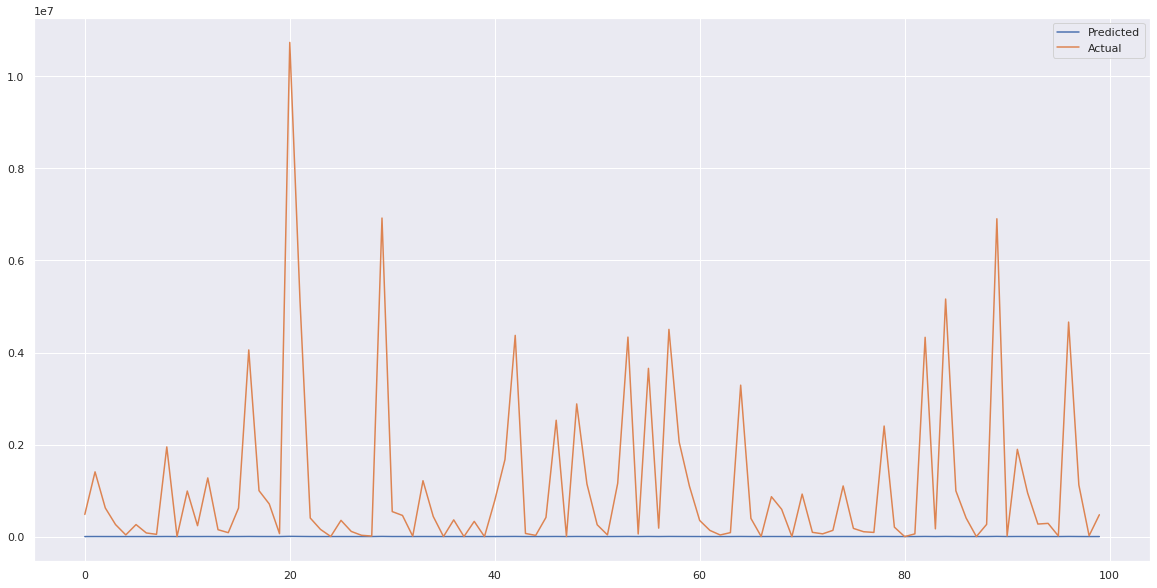

In [ ]:
plt.figure(figsize=(20,10))
plt.plot((y_pred_elastic**2)[:100])
plt.plot((np.array(Y_test**2)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

even though it has high score it is not able to predict higher values so we will not use the model for prediction

---
# random forest
---

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Autumn             8760 non-null   uint8  
 1   Seasons_Spring             8760 non-null   uint8  
 2   Seasons_Summer             8760 non-null   uint8  
 3   Seasons_Winter             8760 non-null   uint8  
 4   Holiday_Holiday            8760 non-null   uint8  
 5   Holiday_No Holiday         8760 non-null   uint8  
 6   Functioning Day_No         8760 non-null   uint8  
 7   Functioning Day_Yes        8760 non-null   uint8  
 8   Rented Bike Count          8760 non-null   int64  
 9   Hour                       8760 non-null   int64  
 10  Temperature(°C)            8760 non-null   float64
 11  Humidity(%)                8760 non-null   int64  
 12  Wind speed (m/s)           8760 non-null   float64
 13  Visibility (10m)           8760 non-null   int64

In [ ]:
# Data for all the independent variables
X = df.drop(columns=['Rented Bike Count'],axis=1)

# Data for the dependent variable
Y = df['Rented Bike Count']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# rfc=RandomForestRegressor(max_leaf_nodes=60,max_depth= 17, n_estimators= 100)
rfc=RandomForestRegressor(max_leaf_nodes=60)

In [ ]:
rfc.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=60,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rfc.score(X_train,Y_train)


0.8858186194674049

In [ ]:
rfc.score(X_test,Y_test)

0.8467786849670258

In [ ]:
train_class_preds_rfc = rfc.predict(X_train)
Y_pred_rf = rfc.predict(X_test)

In [ ]:
pd.DataFrame(np.isnan(Y_pred_rf)).value_counts()

False    2190
dtype: int64

In [ ]:
MSE  = mean_squared_error(Y_test,Y_pred_rf)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(Y_test,Y_pred_rf)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 62994.37575573276
RMSE : 250.9868039474043
R2 : 0.8467786849670258
Adjusted R2 :  0.8454371158492255


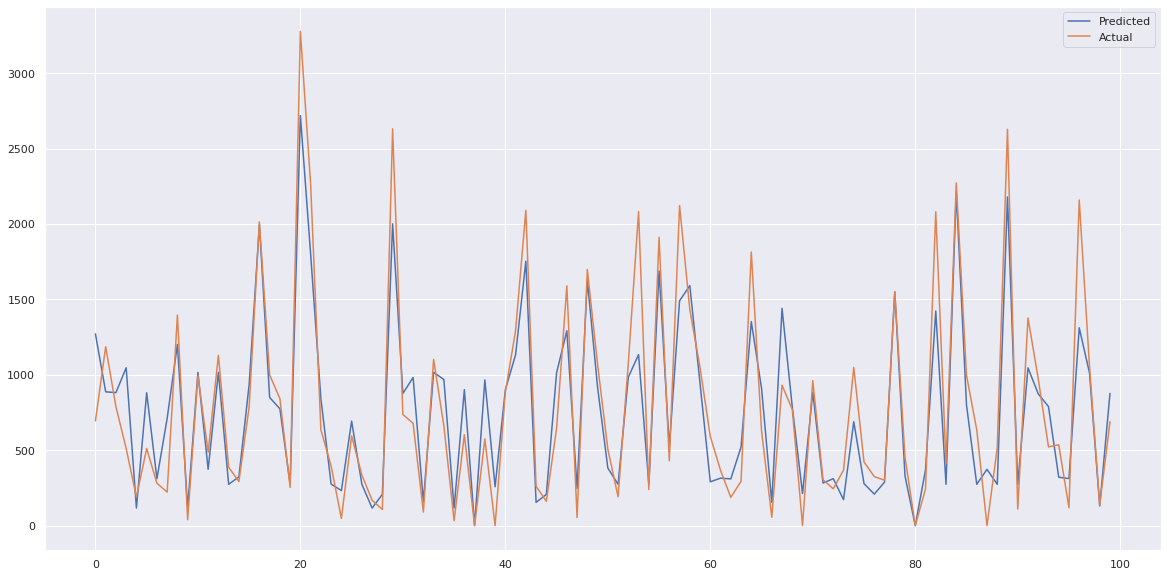

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(Y_pred_rf[:100])
plt.plot(np.array(Y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

## implimenting grid search random forest
---

In [ ]:
rfc=RandomForestRegressor()

In [ ]:
grid_values_rf = {'n_estimators': [80, 100,120],'max_depth': [13,15,17,19],'max_leaf_nodes':[20,40,60]}

In [ ]:
rfc_grid = GridSearchCV(estimator=rfc,param_grid = grid_values_rf, scoring='neg_mean_squared_error',cv=5)

In [ ]:
rfc_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
rfc_grid.score(X_train,Y_train)

-47593.95069184682

In [ ]:
rfc_grid.best_params_

{'max_depth': 17, 'max_leaf_nodes': 60, 'n_estimators': 100}

In [ ]:
train_class_preds_rfc = rfc_grid.predict(X_train)
test_class_preds_rfc = rfc_grid.predict(X_test)

In [ ]:
MSE  = mean_squared_error(Y_test,test_class_preds_rfc)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(Y_test,test_class_preds_rfc)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,test_class_preds_rfc))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 62870.30884661808
RMSE : 250.7395239020328
R2 : 0.8470804530969354
Adjusted R2 :  0.8457415261885675


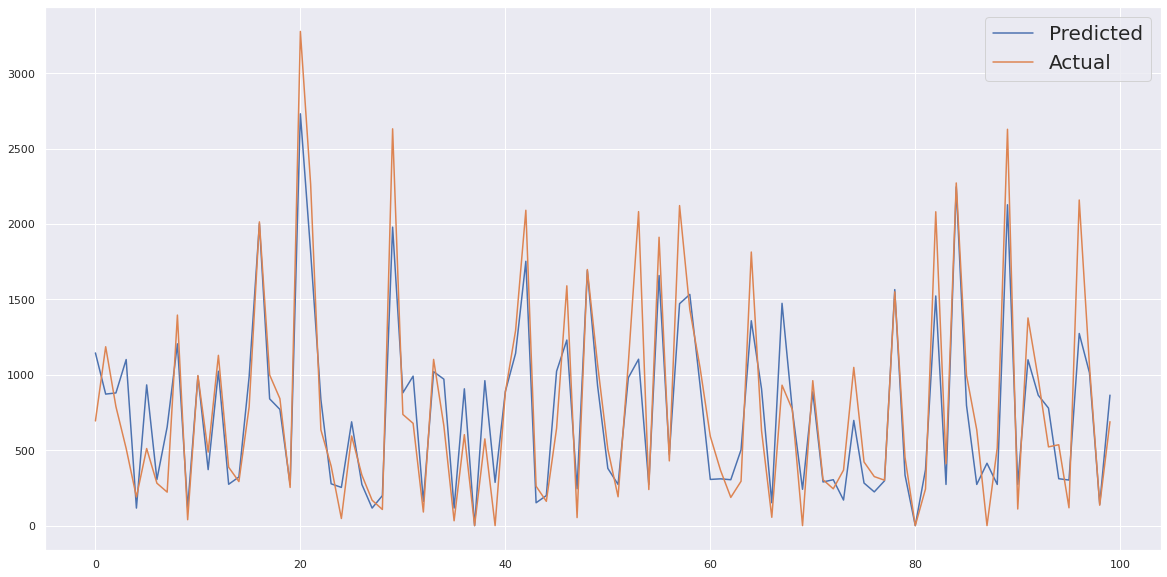

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(test_class_preds_rfc[:100])
plt.plot(np.array(Y_test[:100]))
plt.legend(["Predicted","Actual"],prop={'size': 20})
plt.show()

## BayesSearchCV
---

In [ ]:
pip install scikit-optimize

In [ ]:
grid_values_bs = {'bootstrap': [True, False],
                  'max_depth': [10,12,14,16],
                  'max_features': ['auto', 'sqrt'],
                  'min_samples_leaf': [1, 2, 4],
                  'min_samples_split': [2, 5, 10],
                  'n_estimators': [60,80,100,120,140]}


In [ ]:
from skopt import BayesSearchCV
opt = BayesSearchCV(RandomForestRegressor(random_state=42),
                    grid_values_bs,
                    n_iter=32,
                    cv=5,
                    scoring='neg_mean_squared_error')
opt.fit(X_train, Y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, Y_test))

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

val. score: -44356.500087968125
test score: -45641.045061630626


In [ ]:
opt.best_params_

OrderedDict([('bootstrap', True),
             ('max_depth', 14),
             ('max_features', 'auto'),
             ('min_samples_leaf', 1),
             ('min_samples_split', 5),
             ('n_estimators', 80)])

OrderedDict([('bootstrap', True),
             ('max_depth', 14),
             ('max_features', 'auto'),
             ('min_samples_leaf', 2),
             ('min_samples_split', 5),
             ('n_estimators', 80)])

In [ ]:
opt.score(X_train,Y_train)

-11946.965311722119

In [ ]:
Y_opt_pred=opt.predict(X_test)

In [ ]:
score_metrix(Y_test,Y_opt_pred)

MSE : 45641.045061630626
RMSE : 213.63764897983367
R2 : 0.8889872173519258
Adjusted R2 :  0.8880152160292006


In [ ]:
MSE  = mean_squared_error(Y_test,Y_opt_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(Y_test,Y_opt_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_opt_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 45641.045061630626
RMSE : 213.63764897983367
R2 : 0.8889872173519258
Adjusted R2 :  0.8880152160292006


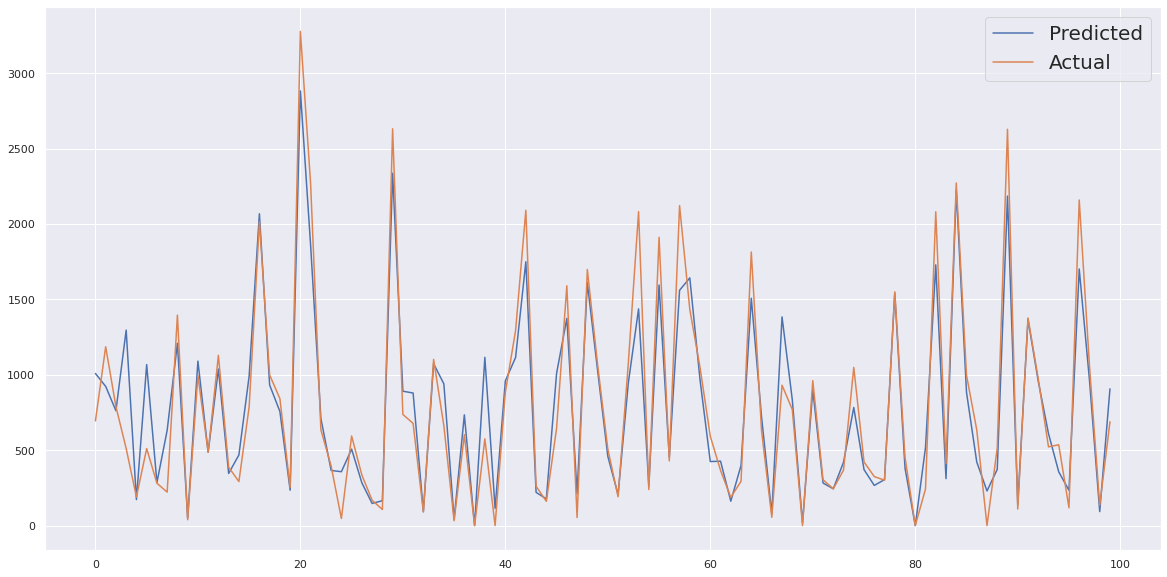

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(Y_opt_pred[:100])
plt.plot(np.array(Y_test[:100]))
plt.legend(["Predicted","Actual"],prop={'size': 20})
plt.show()

#XGboost

learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]

max_depth: determines how deeply each tree is allowed to grow during any boosting round.

subsample: percentage of samples used per tree. Low value can lead to underfitting.

colsample_bytree: percentage of features used per tree. High value can lead to overfitting.

n_estimators: number of trees you want to build.

objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.

alpha: L1 regularization on leaf weights. A large value leads to more regularization.

lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [ ]:
from xgboost import XGBRegressor

OrderedDict([('bootstrap', True),
             ('max_depth', 14),
             ('max_features', 'auto'),
             ('min_samples_leaf', 1),
             ('min_samples_split', 5),
             ('n_estimators', 80)])

In [ ]:
xgbr=XGBRegressor( learning_rate = 0.1,max_depth = 15, alpha = 10, n_estimators = 80)

In [ ]:
xgbr.fit(X_train,Y_train)

[18:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=80,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xgbr.score(X_train,Y_train)

0.9999392266731986

In [ ]:
xgbr.score(X_test,Y_test)

0.8938993124535838

In [ ]:
Y_pred_xhbr=xgbr.predict(X_test)

In [ ]:
score_metrix(Y_test,Y_pred_xhbr)

MSE : 43621.51948508053
RMSE : 208.8576536425719
R2 : 0.8938993124535837
Adjusted R2 :  0.8929703202584768


In [ ]:
xgb_param={'n_estimators': [140,160,180,200],'max_depth': [7,8,9],'alpha':[0.1,1,10]}

In [ ]:
xgb_grid=GridSearchCV(estimator=xgbr,param_grid=xgb_param,cv=5,scoring='neg_mean_squared_error')

In [ ]:
xgb_grid.fit(X_train,Y_train)

[19:09:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:09:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:09:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:09:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:09:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:09:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:09:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:09:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(alpha=10, base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=15,
                                    min_child_weight=1, missing=None,
                                    n_estimators=80, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 1, 10], 'max_depth': [7, 8, 9],
                         'n_estimators': [140, 160

In [ ]:
xgb_grid.best_params_

{'alpha': 0.1, 'max_depth': 8, 'n_estimators': 200}

In [ ]:
Y_pred_xgb=xgb_grid.predict(X_test)

In [ ]:
score_metrix(Y_test,Y_pred_xgb)

MSE : 38225.68115606162
RMSE : 195.51388993128242
R2 : 0.9070236181484832
Adjusted R2 :  0.9062095392290459


In [ ]:
score_metrix(Y_test,Y_pred_xgb)

MSE : 38225.68115606162
RMSE : 195.51388993128242
R2 : 0.9070236181484832
Adjusted R2 :  0.9062095392290459


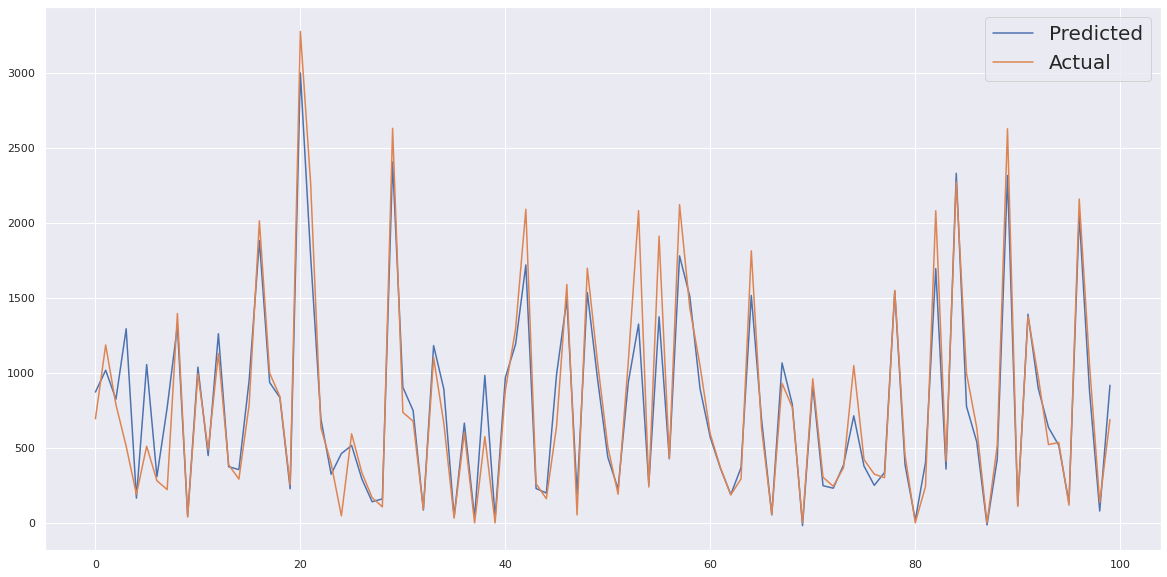

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(Y_pred_xgb[:100])
plt.plot(np.array(Y_test[:100]))
plt.legend(["Predicted","Actual"],prop={'size': 20})
plt.show()

#gbm

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm=GradientBoostingClassifier(max_leaf_nodes=20)

In [ ]:
gbm.fit(X_train,Y_train)

In [ ]:
gbm.score(X_train,Y_train)


In [ ]:
Y_pred_gbm=gbm.predict(X_test)

In [ ]:
score_matrix(Y_test,Y_pred_gbm)

In [ ]:
gbm=GradientBoostingClassifier()

In [ ]:
grid_values_gbm = {'n_estimators': [50, 80, 100],'max_depth': [7,9,11],'max_leaf_nodes':[20,25]}

In [ ]:
gbm_grid = GridSearchCV(estimator=gbm,param_grid = grid_values_rf, scoring='neg_mean_squared_error')

In [ ]:
gbm_grid.fit(X_train,Y_train)

In [ ]:
gbm_grid.score(X_train,Y_train)

In [ ]:
gbm_grid.best_params_

In [ ]:
Y_pred_gbm_grid=gbm.predict(X_test)

In [ ]:
score_matrix(Y_test,Y_pred_gbm_grid)